<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/GS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar la base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])
stopwords.extend(['continuación', 'votamos', 'telemático', 'republicanaizquierda', 'unidainiciativa', 'puede', 'bien', 'propuesta' ,'abstencion', 'mayoría', 'absoluta', 'pregunta', 'don', 'vamos', 'votar', 'llevar', 'cabo', 'millón', 'muchas', 'gracias'])
stopwords.extend(['podemosen', 'podemen', 'ministro', 'ministra', 'ss', 'ruego', 'aprobado', 'aprobada'])
stopwords.extend(['diputado', 'diputada', 'don', 'doña', 'vicepresidenta', 'sagastizab', 'unzetabarrenetxea', 'agirretxea', 'urresti', 'escrutinio', 'dijo', 'dice', 'quevedo'])
stopwords.extend(['campuzano', 'beitialarrangoitia', 'gonzalezmoro', 'mixto'])

In [5]:
# Se incorporan los nombres de los oradores como stopwords
from collections import Counter
nombres=[]
for i in base.namey.unique().tolist(): nombres.extend(str(i).split(' '))
nombres = [x.strip(' ') for x in nombres]
nombres = [x.strip(' †') for x in nombres]
nombres = [x.strip(',') for x in nombres]
nombres=list(Counter(nombres))
nombres.remove('')

In [6]:
stopwords.extend(nombres)

In [7]:
partidos=pd.read_csv('/content/drive/MyDrive/partidos.csv', encoding='latin1', sep=';')

In [8]:
for x in partidos['nombre'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(str(a).split())
  stopwords.extend(a)

for x in partidos['1'].unique():
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['2'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['3'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

In [9]:
len(stopwords)

4481

In [10]:
# elimino acentos de los tokens
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)
list = []
for row in base.values:
    row[20]=row[20].translate(trans)
    list.append(row)

base = pd.DataFrame(list, columns=base.columns)

In [11]:
# llevo las stopwords a minúsculas y elimino acentos
stopwords=[x.lower() for x in stopwords if type(x)==str]
stopwords=[x.translate(trans) for x in stopwords if type(x)==str]

# Mencionadas en al menos 10 discursos
(spoken in at least 10 unique speaker-session)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=[2,2], stop_words=stopwords , min_df=10)
bow = vect.fit_transform(base['tokens'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahuja', 'alcañiz', 'amor', 'arreciado', 'barcena', 'barnuevo', 'capel', 'capitan', 'cascos', 'castejon', 'cienfuegos', 'compromis', 'congr', 'escandon', 'estefani', 'figueroa', 'fortun', 'hickman', 'huarte', 'jeltzalea', 'jovellanos', 'lasquetty', 'latorre', 'legaz', 'lersundi', 'llin', 'machuca', 'maillo', 'mancisidor', 'margallo', 'maribona', 'marlaska', 'medel', 'menchero', 'mendicoa', 'na', 'olivares', 'patxi', 'peces', 'pedrero', 'pinilla', 'piñero', 'ponga', 'pujalte', 'salmones', 'santesmases', 'sito', 'soro', 'sotelo', 'tagle', 'tesorero', 'tizon', 'toledano', 'torrecilla', 'trevijano', 'valdecasas', 'valdes', 'vargas', 'villaseñor', 'ximo', 'yañez'] not in stop_words.
  warnings.warn(


In [13]:
total_features = len(vect.vocabulary_)

# Mencionadas al menos 100 veces en total
(spoken at least 100 times across al sessions)

In [14]:
new_voc={}
for token in vect.vocabulary_: 
  if vect.vocabulary_[token]>100:
    new_voc[token]=vect.vocabulary_[token]

In [15]:
len(new_voc)

270231

# Mencionadas al menos 10 veces en un día
(spoken at least 10 times in at least one session)

In [16]:
# Gentzkow et.al. usan mencionadas al menos 10 veces en una "sesión". Acá se usa mencionadas al menos 10 veces en un "día". 

new_voc2={}
vect = CountVectorizer(ngram_range=[2,2], stop_words=stopwords)
for x in base.fecha.unique(): 
  base_dia=base[pd.DatetimeIndex(base.fecha)==x]
  try: 
    bow = vect.fit_transform(base_dia['tokens'])
    for token in vect.vocabulary_: 
      if vect.vocabulary_[token]>10:
        new_voc2[token]=vect.vocabulary_[token]
  except: pass

In [17]:
len(new_voc2)

7719234

# Combinación

In [18]:
inter=set(new_voc2).intersection(new_voc)

In [19]:
vect = CountVectorizer(ngram_range=[2,2], stop_words=stopwords ,vocabulary=inter)
bow = vect.fit_transform(base['tokens'])
total_features = len(vect.vocabulary_)

In [20]:
# La intersección genera un vocabulario de apenas 814 bigramas. 
total_features

270230

In [21]:
matrix = bow

# Número óptimo de clústers

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# LDA en Sklearn tiene un resultado de score correspondiente al log-likelihood. En base a ese criterio se identifica el número óptimo de clusters. 

from sklearn.model_selection import GridSearchCV

search_params = {'n_components': [10, 30, 50]}

model = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

gridsearch = GridSearchCV(model,
                          param_grid=search_params,
                          n_jobs=-1,
                          verbose=1, 
                          cv=2)
gridsearch.fit(matrix)

## Save the best model
best_lda = gridsearch.best_estimator_

Fitting 2 folds for each of 3 candidates, totalling 6 fits


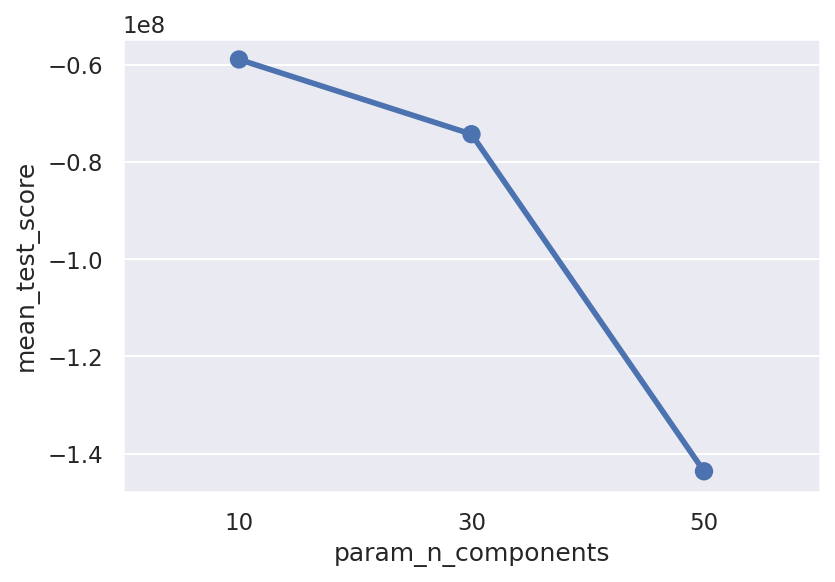

In [ ]:
import seaborn as sns

cv_results_df = pd.DataFrame(gridsearch.cv_results_)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.pointplot(x="param_n_components",
              y="mean_test_score",
              data=cv_results_df)

In [ ]:
# LDA en Sklearn tiene un resultado de score correspondiente al log-likelihood. En base a ese criterio se identifica el número óptimo de clusters. 

from sklearn.model_selection import GridSearchCV

search_params = {'n_components': [8, 15, 20]}

model = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

gridsearch = GridSearchCV(model,
                          param_grid=search_params,
                          n_jobs=-1,
                          verbose=1, 
                          cv=2)
gridsearch.fit(matrix)

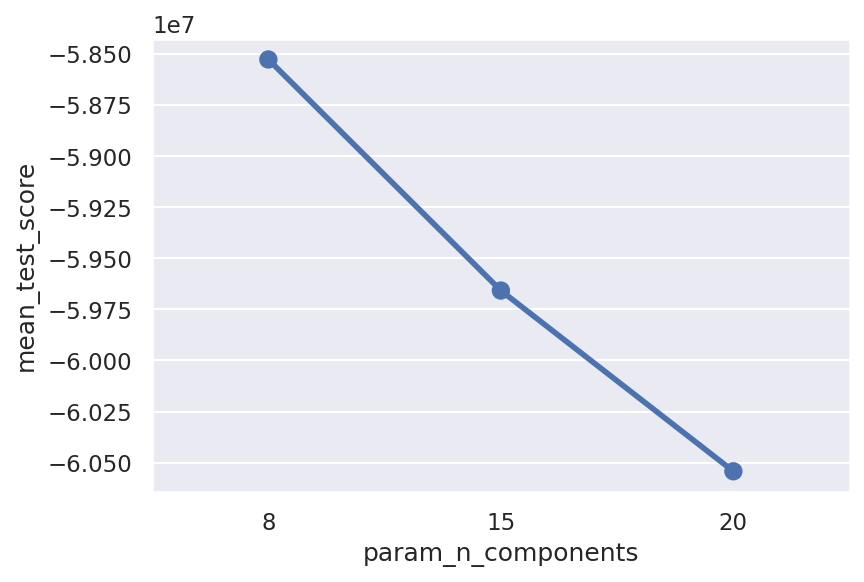

In [25]:
import seaborn as sns

## Save the best model
best_lda = gridsearch.best_estimator_

cv_results_df = pd.DataFrame(gridsearch.cv_results_)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.pointplot(x="param_n_components",
              y="mean_test_score",
              data=cv_results_df)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


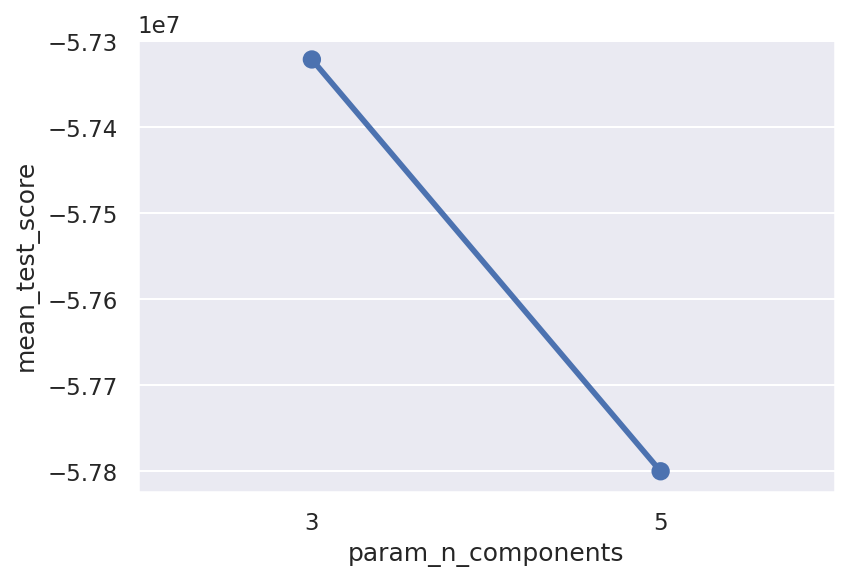

In [27]:
search_params = {'n_components': [3, 5]}

model = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

gridsearch = GridSearchCV(model,
                          param_grid=search_params,
                          n_jobs=-1,
                          verbose=1, 
                          cv=2)
gridsearch.fit(matrix)

## Save the best model
best_lda = gridsearch.best_estimator_

cv_results_df = pd.DataFrame(gridsearch.cv_results_)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.pointplot(x="param_n_components",
              y="mean_test_score",
              data=cv_results_df)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


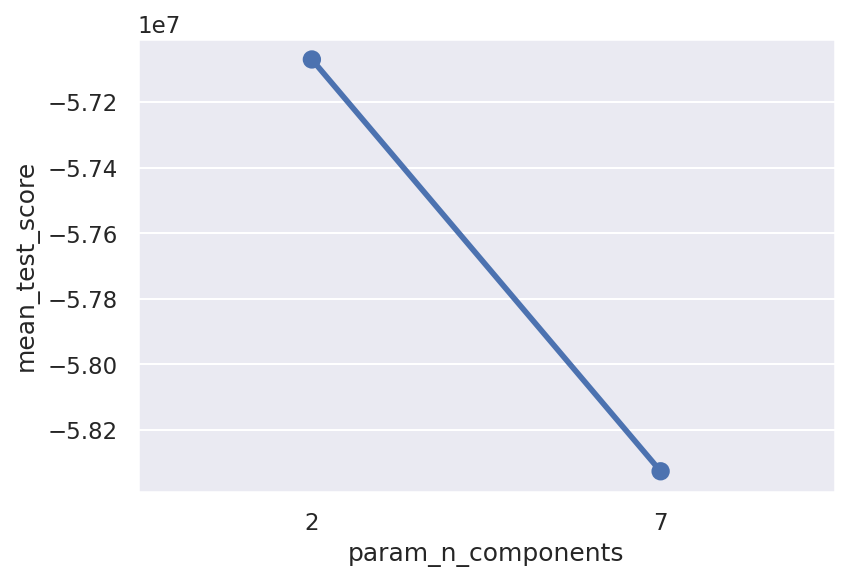

In [28]:
search_params = {'n_components': [2, 7]}

model = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

gridsearch = GridSearchCV(model,
                          param_grid=search_params,
                          n_jobs=-1,
                          verbose=1, 
                          cv=2)
gridsearch.fit(matrix)

## Save the best model
best_lda = gridsearch.best_estimator_

cv_results_df = pd.DataFrame(gridsearch.cv_results_)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.pointplot(x="param_n_components",
              y="mean_test_score",
              data=cv_results_df)

# LDA con 10 clusters

In [ ]:
# Acá hay un problema porque se sigue usando 10 clusters cuando en realidad habría que chequear el número óptimo de clusters una vez definida la cantidad de bigramas a utilizar. 
# Sin embargo, Text as data dice que el número de clústers es generalmente arbitrario, y recomienda arrancar probando con 10. 
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)     

In [ ]:
lda.fit(matrix)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
display_topics(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
tribun constitucion , poder judici , toma consideracion , codigo penal , articulo constitucion , derecho humano , consideracion proposicion , consejo poder , tribun supremo , ordenamiento juridico , administracion justicia , derecho libertad , sentencia tribun , seguridad juridica , ministerio justicia , derecho fundamental , exposicion motivo , organica poder , ministerio fiscal , cort general
Topic 2:
comision europea , consejo europeo , asunto exterior , politica exterior , reino unido , parlamento europeo , numero formula , ceuta melilla , quiero destacar , organismo internacional , comunidad europea , politica europea , comision mixta , institucion europea , desarrollo economico , exterior cooperacion , ministerio asunto , puedo asegurar , comision asunto , defensa presentada
Topic 3:
administracion publica , servicio publico , sistema nacion , nacion salud , funcion publica , salario minimo , servicio igualdad , empleado publico , poder adquisitivo , debat totalidad , si

# LASSO por legislatura

In [ ]:
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from numpy import argsort
import statistics
from statistics import mode
from scipy.special import logsumexp
import scipy as sp

In [ ]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [ ]:
frex_df=pd.DataFrame(frex(lda))

In [ ]:
# Topic que presenta mayor FREX para cada bigrama
d = []
feature_names=vec.get_feature_names_out()
for n in enumerate(feature_names):
    d.append(
        {
            'N': n[0],
            'Bigrama': n[1],
            'Topic':  frex_df[n[0]].argsort()[9]
        }
    )

bi_topic_frex=pd.DataFrame(d)
bi_topic_frex.head(20)

,N,Bigrama,Topic
0,0,abierto competitivo,9
1,1,abierto comunidad,1
2,2,abierto consenso,0
3,3,abierto considerar,6
4,4,abierto cualquier,2
5,5,abierto debat,8
6,6,abierto dialogar,0
7,7,abierto dialogo,9
8,8,abierto dicho,0
9,9,abierto discusion,9


In [ ]:
# Relevancia de bigramas en la predicción por legislatura
tabla=[]
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
n=5

cv=CountVectorizer(ngram_range=[2,2], stop_words=stopwords ,vocabulary=inter)

for x in legislaturas: 
  base_year=base[base.legislatura==x]
  
  vec = cv.fit(base_year['tokens'])
  train_matrix = vec.fit_transform(base_year['tokens']) 
  lr = LogisticRegression(penalty='l1', max_iter=50, solver='liblinear')
  lr.fit(train_matrix,base_year['party'])
  
  features=[]
  s=lr.coef_[0]
  
  print(f"Legislatura: {x} - Most Frecuent Topic: {mode(bi_topic_frex['Topic'][argsort(s)])}")
  print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))
     

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahuja', 'alcañiz', 'amor', 'arreciado', 'barcena', 'barnuevo', 'capel', 'capitan', 'cascos', 'castejon', 'cienfuegos', 'compromis', 'congr', 'escandon', 'estefani', 'figueroa', 'fortun', 'hickman', 'huarte', 'jeltzalea', 'jovellanos', 'lasquetty', 'latorre', 'legaz', 'lersundi', 'llin', 'machuca', 'maillo', 'mancisidor', 'margallo', 'maribona', 'marlaska', 'medel', 'menchero', 'mendicoa', 'na', 'olivares', 'patxi', 'peces', 'pedrero', 'pinilla', 'piñero', 'ponga', 'pujalte', 'salmones', 'santesmases', 'sito', 'soro', 'sotelo', 'tagle', 'tesorero', 'tizon', 'toledano', 'torrecilla', 'trevijano', 'valdecasas', 'valdes', 'vargas', 'villaseñor', 'ximo', 'yañez'] not in stop_words.
  warnings.warn(


Legislatura: I - Most Frecuent Topic: 8
+---------------------+--------------------+--------------------+-------------------------+---------------------+
|    duda ninguna     |  nombr centrista   |  contestar nombr   | interpelacion formulada | contestar formulada |
| -3.7595664514677964 | -3.106113898130977 | -2.773383518879153 |   -2.755256829609694    | -2.567978377990887  |
|          7          |         1          |         1          |            7            |          8          |
| ministerio trabajo  |   cualquier caso   |    poujad ocupa    |   formacion politica    |    pasamo examen    |
| 1.8919608181080438  | 1.9868101753123022 | 2.0136665031299934 |    2.533913748057015    | 3.1913567483816334  |
|          2          |         5          |         7          |            8            |          6          |
+---------------------+--------------------+--------------------+-------------------------+---------------------+
Legislatura: II - Most Frecuent Topic: 8
+------

# LASSO por año

In [ ]:
# Relevancia de bigramas en la predicción por año
tabla=[]

nombres=cv.get_feature_names_out()
componentes=lda.components_.transpose()
n = 5

for x in range (1979, 2010): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  train_matrix = vec.fit_transform(base_year['tokens'])
  y_train= base_year['party']
  lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
  lr.fit(train_matrix,y_train)

  s = lr.coef_[0]
    
  print(f"Año: {x}")
  print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))

Año: 1979
+--------------------+---------------------+---------------------+---------------------+--------------------+
|  correspond ahora  |  publicada boletin  |      quier uso      |     modo especi     |   debat articulo   |
| -3.051146241834419 | -2.1578325468771866 | -1.8093147023194842 | -1.7476463816896606 | -1.703132798065553 |
|         2          |          0          |          4          |          9          |         4          |
|   cualquier caso   |   sino simplement   |   abril martorel    | solucionar problema | formacion politica |
| 1.270884624559489  |  1.415493410609748  | 1.4978171850498985  | 1.6178872338140338  |  2.39166434004746  |
|         5          |          9          |          4          |          7          |         8          |
+--------------------+---------------------+---------------------+---------------------+--------------------+
Año: 1980
+---------------------+---------------------+--------------------+--------------------+-------------